<h1 align=center>数据可视化3:矢量地图可视化</h1>
----
* 作者：吴立宗
* 日期：2016-7-11
* 目标：快速形成元数据或数据文档所需的缩略图

 

## 1.简单可视化方案

In [1]:
import geopandas as gp
import matplotlib.pylab as plt
%matplotlib inline

In [8]:
shape_point='data/natural_earth/10m_cultural/ne_10m_populated_places.shp'
shape_line ='data/natural_earth/10m_physical/ne_10m_rivers_lake_centerlines.shp'
shape_poly ='data/natural_earth/10m_cultural/ne_10m_admin_0_countries.shp'

In [9]:
df_point=gp.read_file(shape_point)
df_line =gp.read_file(shape_line)
df_poly =gp.read_file(shape_poly)

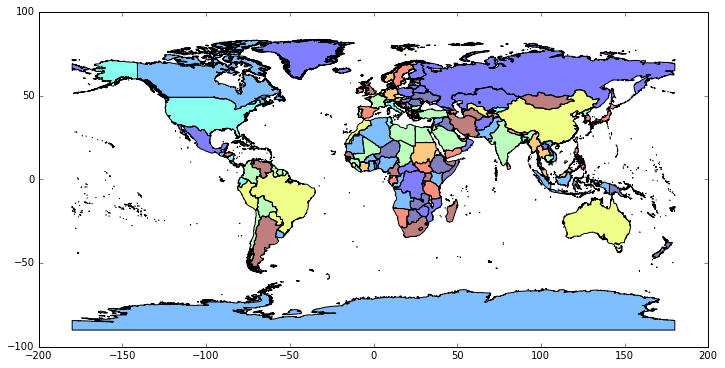

In [5]:
ax=df_poly.plot(figsize=(12,12))

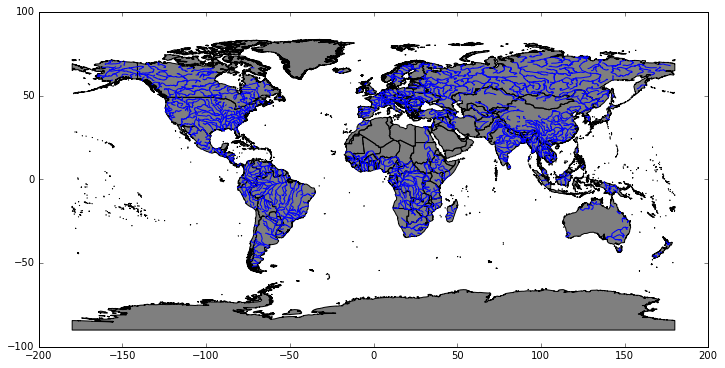

In [11]:
ax=df_poly.plot(figsize=(12,12),color='black')
ax2=df_line.plot(ax=ax,color='blue')

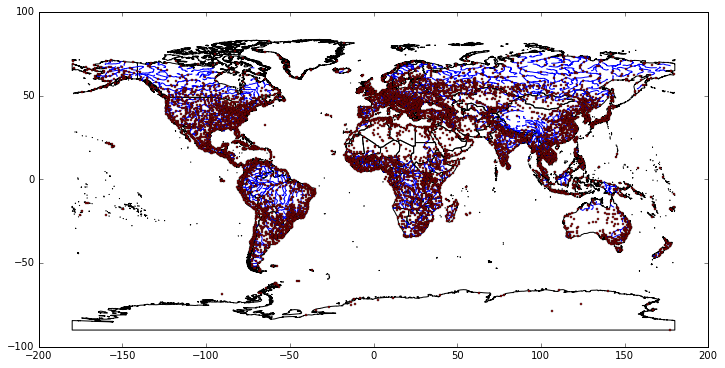

In [12]:
ax=df_poly.plot(figsize=(12,12),color='black',facecolor='white')
ax2=df_line.plot(ax=ax,color='blue')
ax3=df_point.plot(ax=ax,color='red')


## 2.叠加基础底图

In [24]:
import cartopy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
% matplotlib inline


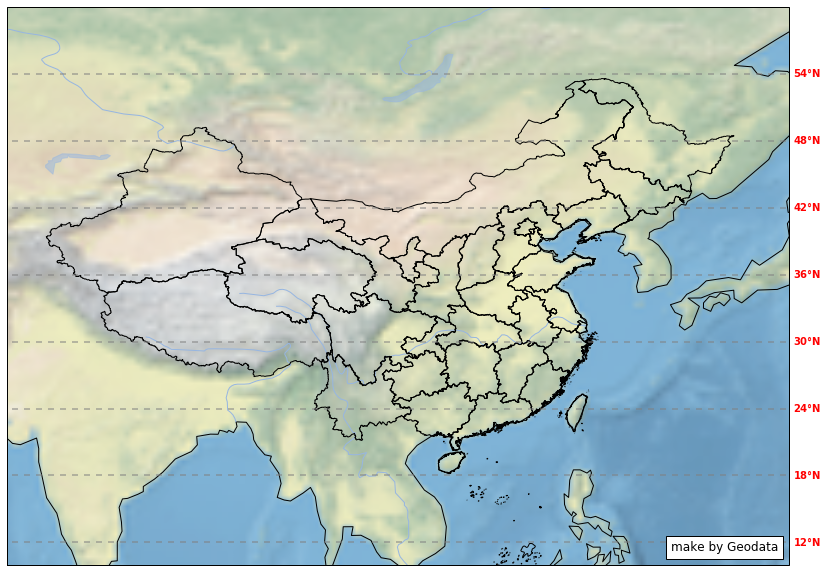

In [25]:
fig = plt.figure(figsize=[20,10])
ax = plt.axes(projection=ccrs.PlateCarree())
fname = 'data/China_boundary_province.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),ccrs.PlateCarree(), facecolor='none')
#设置显示范围
#ax.set_global()
ax.stock_img()
ax.set_extent([70, 140, 10, 55])
ax.stock_img()
#加载全球的Naturnal Earth 数据

ax.add_feature(cartopy.feature.COASTLINE)
#ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(shape_feature)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='gray', \
                  alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = False
gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'color': 'red', 'weight': 'bold'}
text = AnchoredText('make by Geodata',loc=4, prop={'size': 12}, frameon=True)
ax.add_artist(text)
plt.show()

## 3.叠加web地图

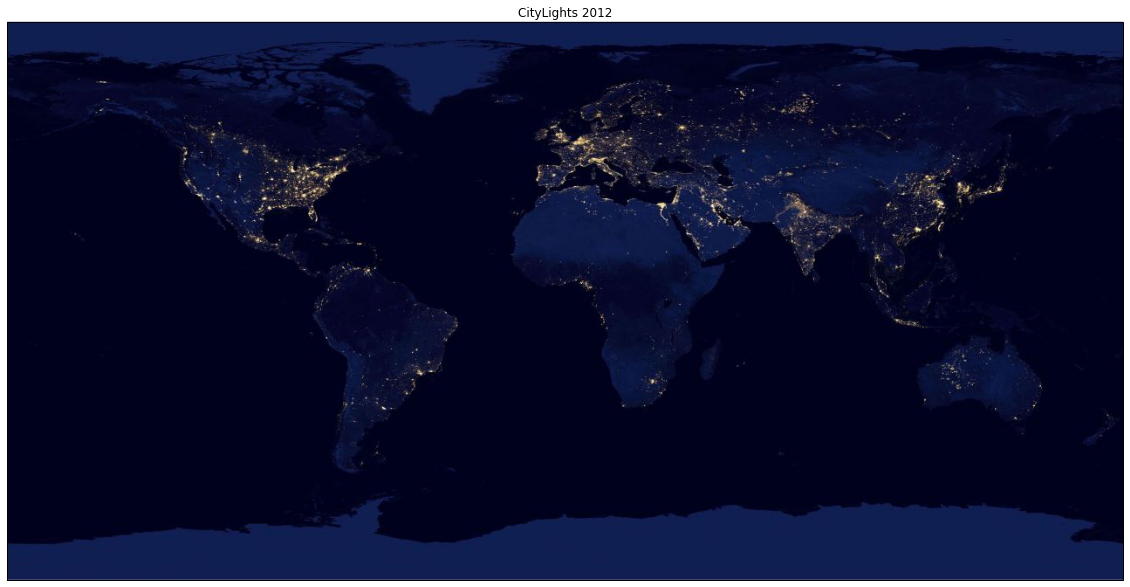

In [26]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
url = 'https://map1c.vis.earthdata.nasa.gov/wmts-geo/wmts.cgi'
layer = 'VIIRS_CityLights_2012'

fig = plt.figure(figsize=[20,10])
ax = plt.axes(projection=ccrs.PlateCarree())##Robinson())
ax.add_wmts(url, layer)
ax.set_global()

plt.title('CityLights 2012')
plt.show()